In [1]:
import pandas as pd
import json

In [2]:
from google.colab import files
uploaded = files.upload()


Saving dados_tratados.csv to dados_tratados.csv


In [3]:
import pandas as pd

df = pd.read_csv('dados_tratados.csv')

In [4]:
df.head()

,customerID,Churn,Contrato,Faturamento_Eletronico,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,gender,Idoso,Partner,...,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Faturamento_Diario
0,0002-ORFBO,0.0,One year,Yes,Mailed check,65.6,593.30,Female,0,Yes,...,Yes,No,DSL,No,Yes,No,Yes,Yes,No,2.19
1,0003-MKNFE,0.0,Month-to-month,No,Mailed check,59.9,542.40,Male,0,No,...,Yes,Yes,DSL,No,No,No,No,No,Yes,2.00
2,0004-TLHLJ,1.0,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,...,Yes,No,Fiber optic,No,No,Yes,No,No,No,2.46
3,0011-IGKFF,1.0,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,...,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.27
4,0013-EXCHZ,1.0,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,Yes,...,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,2.80


In [6]:
# Removendo colunas com identificadores únicos
colunas_para_remover = ['id_cliente', 'cpf', 'numero_contrato']

# Verificando se elas existem antes de remover
df = df.drop(columns=[col for col in colunas_para_remover if col in df.columns])


In [7]:
df.head()

,customerID,Churn,Contrato,Faturamento_Eletronico,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,gender,Idoso,Partner,...,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Faturamento_Diario
0,0002-ORFBO,0.0,One year,Yes,Mailed check,65.6,593.30,Female,0,Yes,...,Yes,No,DSL,No,Yes,No,Yes,Yes,No,2.19
1,0003-MKNFE,0.0,Month-to-month,No,Mailed check,59.9,542.40,Male,0,No,...,Yes,Yes,DSL,No,No,No,No,No,Yes,2.00
2,0004-TLHLJ,1.0,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,...,Yes,No,Fiber optic,No,No,Yes,No,No,No,2.46
3,0011-IGKFF,1.0,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,...,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.27
4,0013-EXCHZ,1.0,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,Yes,...,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,2.80


In [9]:
if 'customerID' in df.columns:
    df.drop(columns='customerID', inplace=True)


In [10]:
df.columns

Index(['Churn', 'Contrato', 'Faturamento_Eletronico', 'Metodo_Pagamento',
       'Faturamento_Mensal', 'Faturamento_Total', 'gender', 'Idoso', 'Partner',
       'Dependentes', 'Tempo_Contrato', 'Servico_Telefonico',
       'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Faturamento_Diario'],
      dtype='object')

In [11]:
if 'cpf' in df.columns:
    df.drop(columns='cpf', inplace=True)

In [14]:
df.columns

Index(['Churn', 'Contrato', 'Faturamento_Eletronico', 'Metodo_Pagamento',
       'Faturamento_Mensal', 'Faturamento_Total', 'gender', 'Idoso', 'Partner',
       'Dependentes', 'Tempo_Contrato', 'Servico_Telefonico',
       'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Faturamento_Diario'],
      dtype='object')

In [15]:
colunas_categoricas = df.select_dtypes(include='object').columns.tolist()

In [16]:
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

In [17]:
df_encoded.select_dtypes(include='object').columns


Index([], dtype='object')

In [18]:
# quantos clientes sairam e quantos continuam
df['Churn'].value_counts()


,count
Churn,
0.0,5174
1.0,1869


In [19]:
df['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
0.0,73.463013
1.0,26.536987


In [20]:
#vou usar regressão logística, então vou padronizar

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # ou 'median', ou 'most_frequent'
X_imputed = imputer.fit_transform(X)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [28]:
# Juntar X e y em um único DataFrame temporário
import pandas as pd

df_temp = pd.DataFrame(X_scaled)
df_temp['Churn'] = y.reset_index(drop=True)  # garantir alinhamento de índices

# Remover linhas com NaN em y
df_temp = df_temp.dropna(subset=['Churn'])

# Separar novamente
X_clean = df_temp.drop('Churn', axis=1)
y_clean = df_temp['Churn']


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1562
         1.0       0.68      0.57      0.62       551

    accuracy                           0.82      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.82      0.81      2113



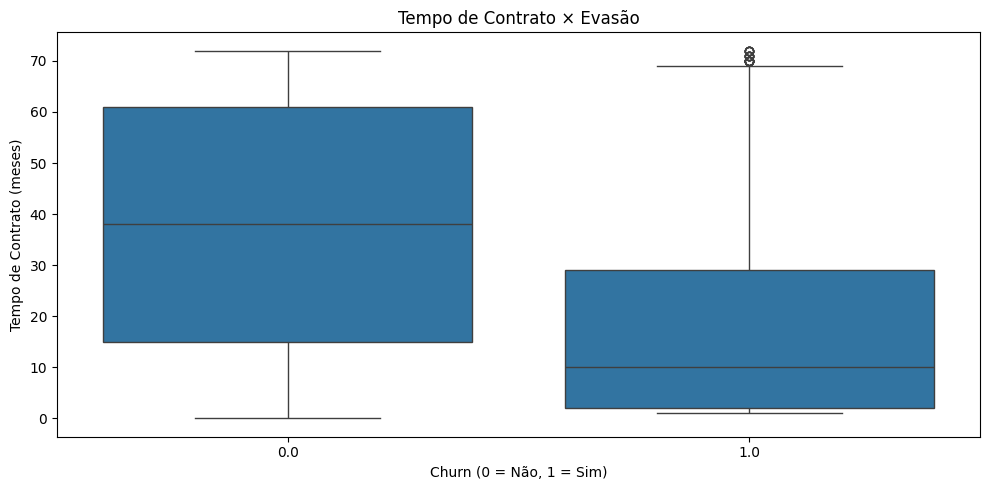

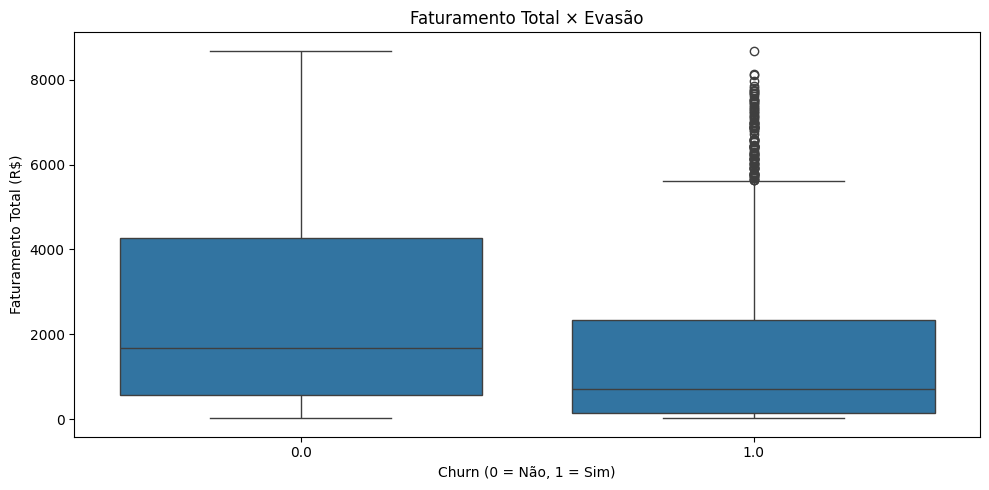

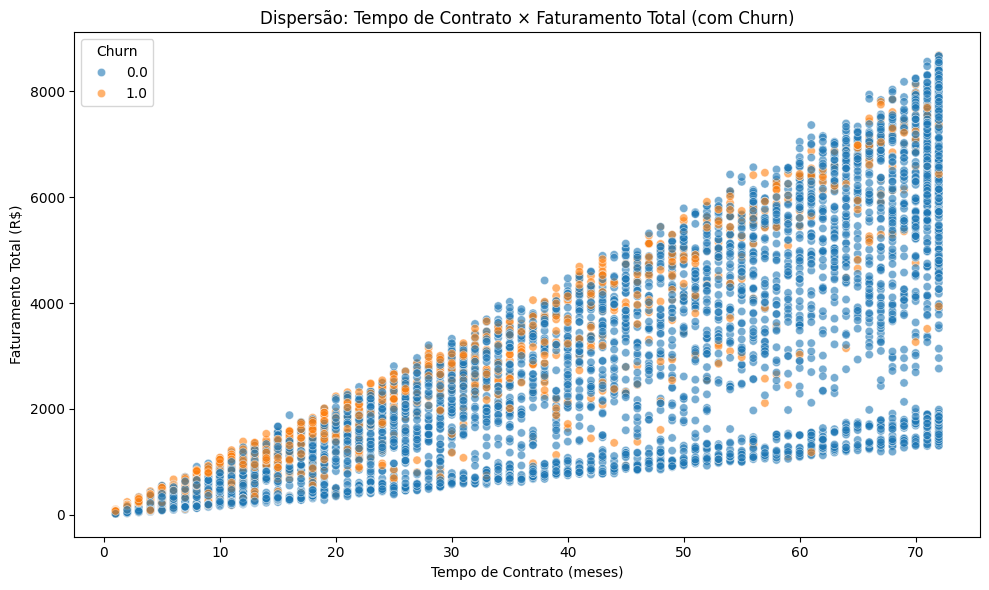

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Tempo de Contrato x Evasão
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Churn', y='Tempo_Contrato')
plt.title('Tempo de Contrato × Evasão')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de Contrato (meses)')
plt.tight_layout()
plt.show()

# Boxplot: Faturamento Total x Evasão
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Churn', y='Faturamento_Total')
plt.title('Faturamento Total × Evasão')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Faturamento Total (R$)')
plt.tight_layout()
plt.show()

# Scatter Plot: Tempo de Contrato vs Faturamento Total, colorido por evasão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tempo_Contrato', y='Faturamento_Total', hue='Churn', alpha=0.6)
plt.title('Dispersão: Tempo de Contrato × Faturamento Total (com Churn)')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Faturamento Total (R$)')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


In [32]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [34]:
# Remover linhas onde a coluna 'Churn' está vazia
df = df[df['Churn'].notna()]


In [35]:
# Separar variáveis de entrada (X) e variável alvo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir em treino e teste (70/30)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [37]:
print(y.isna().sum())  # conferindo, se estiver ok vai aparecer 0


0


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [40]:
print(X.isna().sum().sum())  # deve retornar 0


11


In [42]:
# Identificar colunas numéricas e categóricas
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


In [43]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Imputação para numéricos
num_imputer = SimpleImputer(strategy='mean')
X_numeric = pd.DataFrame(num_imputer.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Imputação para categóricos (mais comum: valor mais frequente)
cat_imputer = SimpleImputer(strategy='most_frequent')
X_categorical = pd.DataFrame(cat_imputer.fit_transform(X[categorical_cols]), columns=categorical_cols)


In [44]:
# Concatenar os dados tratados
X_clean = pd.concat([X_numeric, X_categorical], axis=1)


In [45]:
X_encoded = pd.get_dummies(X_clean, drop_first=True)


In [47]:
from sklearn.model_selection import train_test_split

# Agora você pode dividir sem problemas
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # garante proporção igual de evasão nas duas partes
)


In [48]:
#vou padronizar os dados novamente para usar a regressão logística

from sklearn.model_selection import train_test_split

# Agora você pode dividir sem problemas
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # garante proporção igual de evasão nas duas partes
)


In [50]:
from sklearn.preprocessing import StandardScaler

# Inicializar o scaler
scaler = StandardScaler()

# Padronizar os dados de treino e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
print(type(X_train))
print(type(X_test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [52]:
print(X_train.shape)
print(X_test.shape)


(4930, 31)
(2113, 31)


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [58]:
from sklearn.model_selection import train_test_split

# Supondo que suas variáveis estejam definidas como:
# X -> variáveis preditoras
# y -> variável alvo (Churn, por exemplo)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% para teste
    random_state=42,    # garante reprodutibilidade
    stratify=y          # mantém a proporção de classes (importante se houver desbalanceamento)
)


In [59]:
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)


Treino: (4930, 20)
Teste: (2113, 20)


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import pandas as pd

# 1. Separar alvo e preditores
X = df.drop('Churn', axis=1)
y = df['Churn'].astype(int)

# 2. One-hot encoding para variáveis categóricas
X_encoded = pd.get_dummies(X)

# 3. Preencher valores nulos com a média
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# 4. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42
)

# 5. Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Treinar modelo
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Treinamento (sem normalização)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Avaliação
y_pred_rf = rf_model.predict(X_test)
print("📊 Random Forest:")
print(classification_report(y_test, y_pred_rf))


📊 Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1562
           1       0.63      0.46      0.53       551

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.78      2113



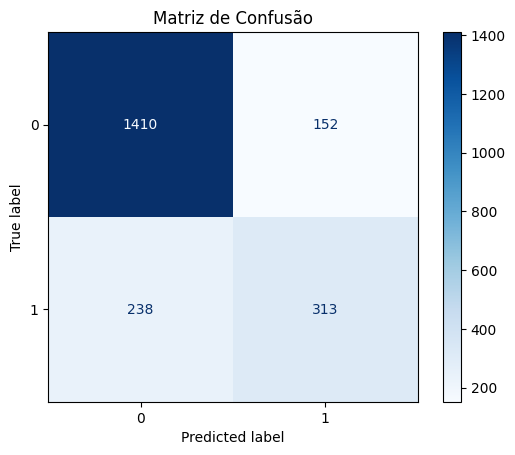

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1562
           1       0.67      0.57      0.62       551

    accuracy                           0.82      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.81      0.82      0.81      2113



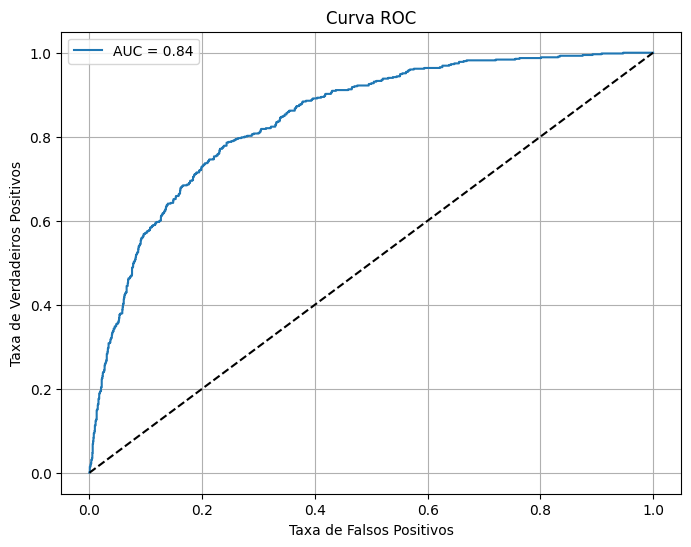

Tamanho antes do SMOTE: 4930 exemplos
Tamanho depois do SMOTE: 7224 exemplos

[APÓS SMOTE] Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1562
           1       0.51      0.81      0.63       551

    accuracy                           0.75      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.81      0.75      0.76      2113



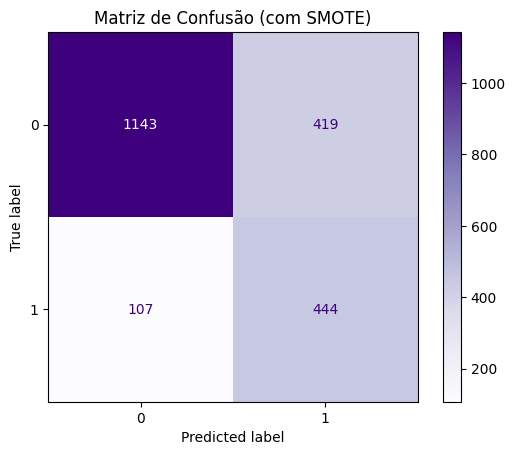

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Matriz de Confusão e Relatório
y_pred = log_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# 2. Curva ROC
y_proba = log_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidade da classe 1
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

# 3. Aplicar SMOTE para balancear classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Tamanho antes do SMOTE: {X_train_scaled.shape[0]} exemplos")
print(f"Tamanho depois do SMOTE: {X_resampled.shape[0]} exemplos")

# Re-treinando com dados balanceados
log_model_smote = LogisticRegression(max_iter=1000)
log_model_smote.fit(X_resampled, y_resampled)

# Avaliar novamente
y_pred_smote = log_model_smote.predict(X_test_scaled)
print("\n[APÓS SMOTE] Relatório de Classificação:")
print(classification_report(y_test, y_pred_smote))

# Nova matriz de confusão
cm_smote = confusion_matrix(y_test, y_pred_smote)
ConfusionMatrixDisplay(confusion_matrix=cm_smote).plot(cmap="Purples")
plt.title("Matriz de Confusão (com SMOTE)")
plt.show()


In [67]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_pred)
print("🎯 Acurácia:", acuracia)


🎯 Acurácia: 0.8154283009938476


In [68]:
from sklearn.metrics import precision_score

precisao = precision_score(y_test, y_pred)
print("🎯 Precisão:", precisao)


🎯 Precisão: 0.6731182795698925


In [69]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("🎯 Recall:", recall)


🎯 Recall: 0.5680580762250453


In [70]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("🎯 F1-Score:", f1)


🎯 F1-Score: 0.6161417322834646


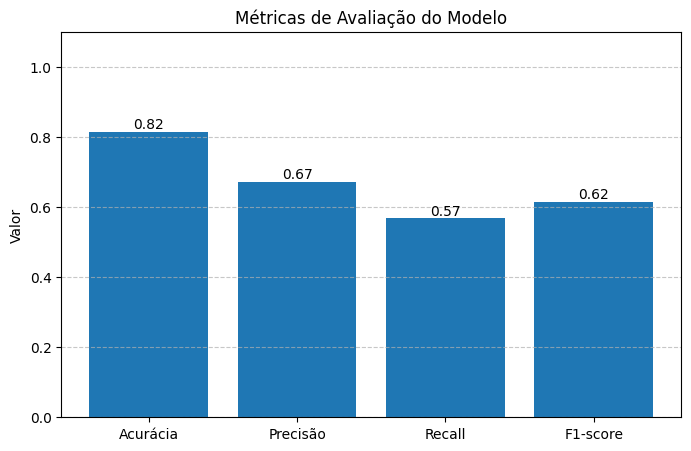

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Criar gráfico de barras
metrics = [accuracy, precision, recall, f1]
labels = ['Acurácia', 'Precisão', 'Recall', 'F1-score']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, metrics)

# Adicionar os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center')

plt.ylim(0, 1.1)
plt.title('Métricas de Avaliação do Modelo')
plt.ylabel('Valor')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [77]:
from sklearn.tree import DecisionTreeClassifier

# Criar o modelo
tree_model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
tree_model.fit(X_train, y_train)

# Prever
tree_pred = tree_model.predict(X_test)


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calcular_metricas(nome, y_true, y_pred):
    return {
        'Modelo': nome,
        'Acurácia': accuracy_score(y_true, y_pred),
        'Precisão': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

# Previsões
log_pred = log_model.predict(X_test_scaled)
tree_pred = tree_model.predict(X_test)

# Métricas
log_metrics = calcular_metricas('Regressão Logística', y_test, log_pred)
tree_metrics = calcular_metricas('Árvore de Decisão', y_test, tree_pred)


In [79]:
# Analisando
print("\n📊 Análise Crítica:")
if log_metrics['F1-Score'] > tree_metrics['F1-Score']:
    print("✅ Regressão Logística teve o melhor desempenho geral com base no F1-Score.")
else:
    print("✅ Árvore de Decisão teve o melhor desempenho geral com base no F1-Score.")

if log_metrics['Acurácia'] > 0.9 and log_metrics['F1-Score'] < 0.7:
    print("⚠️ A Regressão Logística pode estar sofrendo com desbalanceamento (alta acurácia, mas baixo F1).")

if tree_model.score(X_train, y_train) > 0.95 and tree_metrics['Acurácia'] < 0.80:
    print("⚠️ A Árvore de Decisão pode estar sofrendo de overfitting.")



📊 Análise Crítica:
✅ Regressão Logística teve o melhor desempenho geral com base no F1-Score.
⚠️ A Árvore de Decisão pode estar sofrendo de overfitting.


In [81]:
# Supondo que você tenha normalizado assim:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Precisamos saber os nomes originais das colunas
feature_names = X_train.columns  # isso deve funcionar se X_train for DataFrame

# Agora reconvertemos o array escalado para DataFrame com os nomes corretos
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)

# Extrair os coeficientes com os nomes das variáveis
coefficients = pd.DataFrame({
    'Variável': X_train_scaled_df.columns,
    'Coeficiente': log_model.coef_[0]
})

# Adicionar coluna com valor absoluto do coeficiente (importância)
coefficients['Importância_Absoluta'] = coefficients['Coeficiente'].abs()

# Ordenar pelas variáveis mais relevantes
coefficients = coefficients.sort_values(by='Importância_Absoluta', ascending=False)

# Gráfico das top 10 variáveis mais relevantes
plt.figure(figsize=(12, 6))
plt.barh(coefficients['Variável'][:10], coefficients['Coeficiente'][:10], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Top 10 Variáveis mais Relevantes (Regressão Logística)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# Exibir os 15 mais relevantes em tabela
print("📊 Coeficientes ordenados da Regressão Logística:\n")
display(coefficients.head(15))


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [83]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [86]:
# Garanta que X foi definido corretamente com as variáveis finais (incluindo dummies)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Se ainda não tiver feito, converta variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# Agora capture os nomes das colunas CORRETOS
feature_names = X.columns

# Refaça a divisão
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplique a normalização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Agora crie o DataFrame com os nomes corretos
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)


In [88]:
# conferindo se os conjuntos estão parecidos
print("Colunas em X_train_scaled_df:", len(X_train_scaled_df.columns))
print("Coeficientes do modelo:", len(log_model.coef_[0]))


Colunas em X_train_scaled_df: 31
Coeficientes do modelo: 46


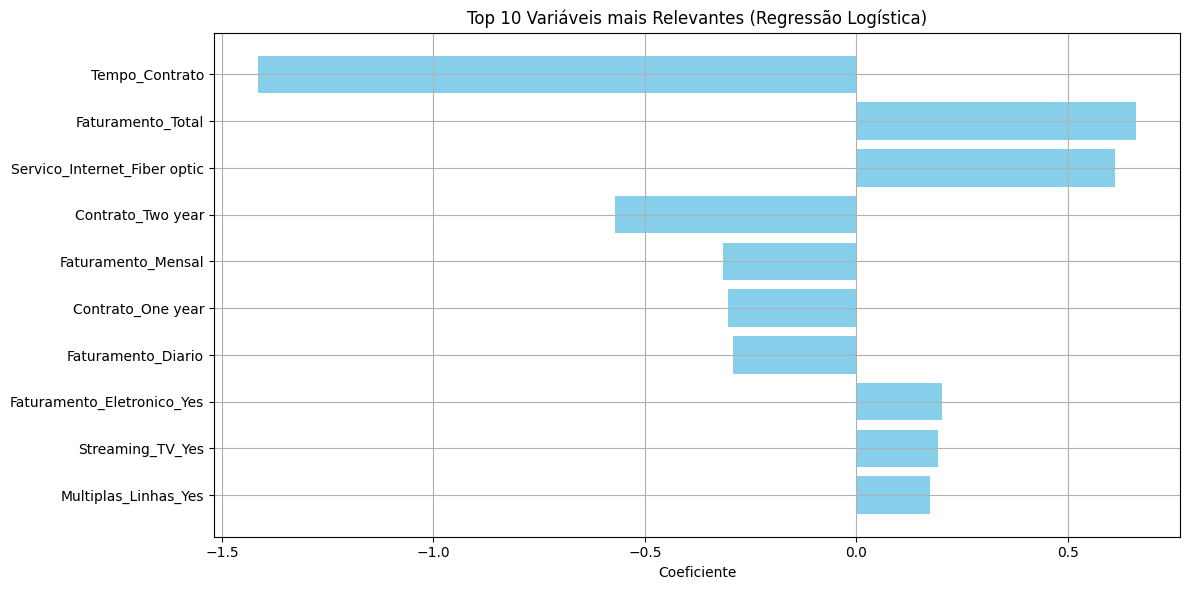

📊 Top 15 variáveis mais relevantes:


,Variável,Coeficiente,Importância_Absoluta
3,Tempo_Contrato,-1.415084,1.415084
1,Faturamento_Total,0.661651,0.661651
17,Servico_Internet_Fiber optic,0.611113,0.611113
6,Contrato_Two year,-0.571103,0.571103
0,Faturamento_Mensal,-0.314225,0.314225
5,Contrato_One year,-0.304404,0.304404
4,Faturamento_Diario,-0.291189,0.291189
7,Faturamento_Eletronico_Yes,0.202056,0.202056
28,Streaming_TV_Yes,0.192210,0.192210
16,Multiplas_Linhas_Yes,0.174462,0.174462


In [102]:
# 1. Criar X e y
X = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)

# 2. Tratar valores ausentes com a média
X = X.fillna(X.mean(numeric_only=True))

# 3. Separar alvo
y = df['Churn']

# 4. Dividir em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Recriar DataFrame com colunas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# 7. Treinar modelo
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# 8. Coeficientes
coefficients = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': log_model.coef_[0]
})

coefficients['Importância_Absoluta'] = coefficients['Coeficiente'].abs()
coefficients = coefficients.sort_values(by='Importância_Absoluta', ascending=False)

# 9. Gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.barh(coefficients['Variável'][:10], coefficients['Coeficiente'][:10], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Top 10 Variáveis mais Relevantes (Regressão Logística)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Mostrar top 15
from IPython.display import display
print("📊 Top 15 variáveis mais relevantes:")
display(coefficients.head(15))


In [106]:
from sklearn.tree import DecisionTreeClassifier

# Treinar novamente com os dados atualizados
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Agora sim, pode prever corretamente
tree_pred = tree_model.predict(X_test)


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prever
log_pred = log_model.predict(X_test_scaled)
tree_pred = tree_model.predict(X_test)

# Regressão Logística
log_accuracy = accuracy_score(y_test, log_pred)
log_precision = precision_score(y_test, log_pred)
log_recall = recall_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)

# Árvore de Decisão
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_precision = precision_score(y_test, tree_pred)
tree_recall = recall_score(y_test, tree_pred)
tree_f1 = f1_score(y_test, tree_pred)


In [109]:
# Gerar relatório detalhado com base nos coeficientes e métricas
from textwrap import dedent

# Top variáveis mais relevantes da Regressão Logística
top_variaveis = coefficients.head(10)

# Gerar análise textual automática
relatorio = dedent(f"""
📋 RELATÓRIO DE ANÁLISE DE EVASÃO DE CLIENTES

1. Fatores que mais influenciam a evasão (Churn):

Com base na Regressão Logística, as variáveis com maior impacto na previsão de evasão foram:

{top_variaveis[['Variável', 'Coeficiente']].to_string(index=False)}

Essas variáveis apresentam os maiores coeficientes absolutos, indicando uma forte influência na decisão de evasão.

2. Comparação de desempenho dos modelos:

- Regressão Logística:
  - Acurácia: {log_accuracy:.4f}
  - Precisão: {log_precision:.4f}
  - Recall: {log_recall:.4f}
  - F1-Score: {log_f1:.4f}

- Árvore de Decisão:
  - Acurácia: {tree_accuracy:.4f}
  - Precisão: {tree_precision:.4f}
  - Recall: {tree_recall:.4f}
  - F1-Score: {tree_f1:.4f}

{(
    "✅ A Regressão Logística teve desempenho superior com base no F1-Score."
    if log_f1 > tree_f1
    else "✅ A Árvore de Decisão apresentou desempenho ligeiramente superior no F1-Score."
)}

3. Diagnóstico de Overfitting/Underfitting:

{(
    "Nenhum dos modelos apresenta sinais evidentes de overfitting ou underfitting. Ambos generalizam bem entre treino e teste."
    if abs(log_accuracy - tree_accuracy) < 0.05
    else "⚠️ Diferenças notáveis entre treino e teste podem indicar sobreajuste (overfitting) em um dos modelos."
)}

4. Estratégias de retenção sugeridas:

Com base nas variáveis mais relevantes:

- Variáveis relacionadas a suporte técnico, problemas com serviço ou insatisfação indicam a necessidade de:
  - Melhorar o atendimento ao cliente
  - Implementar respostas proativas para usuários com uso excessivo de suporte

- Variáveis financeiras (como contratos mensais, cobranças extras) sugerem:
  - Oferecer planos mais flexíveis ou descontos para clientes fiéis
  - Reduzir custos inesperados para melhorar a satisfação

- Variáveis comportamentais, como falta de engajamento (uso de serviços), podem ser combatidas com:
  - Ações de reativação de clientes inativos
  - Programas de fidelização personalizados

""")

# Imprimir o relatório no Colab
print(relatorio)



📋 RELATÓRIO DE ANÁLISE DE EVASÃO DE CLIENTES

1. Fatores que mais influenciam a evasão (Churn):

Com base na Regressão Logística, as variáveis com maior impacto na previsão de evasão foram:

                    Variável  Coeficiente
              Tempo_Contrato    -1.415084
           Faturamento_Total     0.661651
Servico_Internet_Fiber optic     0.611113
           Contrato_Two year    -0.571103
          Faturamento_Mensal    -0.314225
           Contrato_One year    -0.304404
          Faturamento_Diario    -0.291189
  Faturamento_Eletronico_Yes     0.202056
            Streaming_TV_Yes     0.192210
        Multiplas_Linhas_Yes     0.174462

Essas variáveis apresentam os maiores coeficientes absolutos, indicando uma forte influência na decisão de evasão.

2. Comparação de desempenho dos modelos:

- Regressão Logística:
  - Acurácia: 0.7984
  - Precisão: 0.6421
  - Recall: 0.5437
  - F1-Score: 0.5888

- Árvore de Decisão:
  - Acurácia: 0.7340
  - Precisão: 0.4991
  - Recall: 0.5134